In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import itertools

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
DATA_DIR = "./"
DATA_FILENAMES = {"bluetooth": "bt_symmetric.csv",
                  "calls": "calls.csv",
                  "sms": "sms.csv",
                  "facebook_friends": "fb_friends.csv",
                  "genders": "genders.csv"}

In [3]:
def LoadData(data_filename, data_dir):
  '''Loads data from |data_dir|/|data_filename|. Returns Pandas dataframe.'''
  return pd.read_csv(os.path.join(data_dir, data_filename))  

In [4]:
df_bt = LoadData(DATA_FILENAMES["bluetooth"], DATA_DIR)
print("bluetooth\n", df_bt.head())

df_calls = LoadData(DATA_FILENAMES["calls"], DATA_DIR)
print("\ncalls\n", df_calls.head())

df_sms = LoadData(DATA_FILENAMES["sms"], DATA_DIR)
print("\nsms\n", df_sms.head())

df_facebook_friends = LoadData(DATA_FILENAMES["facebook_friends"], DATA_DIR)
print("\nfacebook friends\n", df_facebook_friends.head())

df_genders = LoadData(DATA_FILENAMES["genders"], DATA_DIR)
print("\ngenders\n", df_genders.head())

bluetooth
    # timestamp  user_a  user_b  rssi
0            0       0      -1     0
1            0       1      -1     0
2            0       2      -1     0
3            0       3      -2   -88
4            0       5      -1     0

calls
    timestamp  caller  callee  duration
0        184     300     301       121
1       3920     512     299       670
2       5623     301     300       504
3       9252     401     457        -1
4      15466     512       0         5

sms
    timestamp  sender  recipient
0         18     370        512
1         37     512        370
2        126     370        512
3        134       0        512
4        312     137        136

facebook friends
    # user_a  user_b
0         0     512
1         0     263
2         0     525
3         0     285
4         0     543

genders
    # user  female
0       0       0
1       2       0
2       3       0
3       4       0
4       5       0


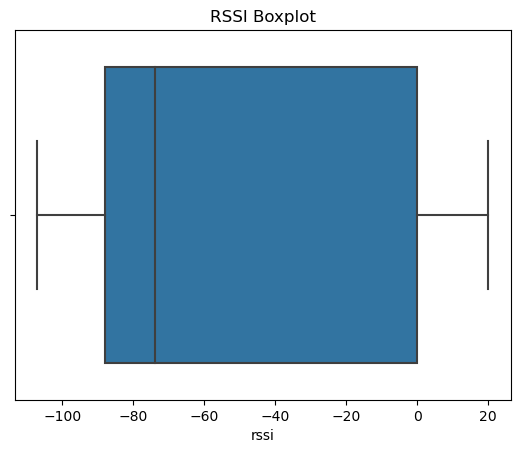

In [5]:
sns.boxplot(x=df_bt['rssi'])
plt.title('RSSI Boxplot')

plt.show()

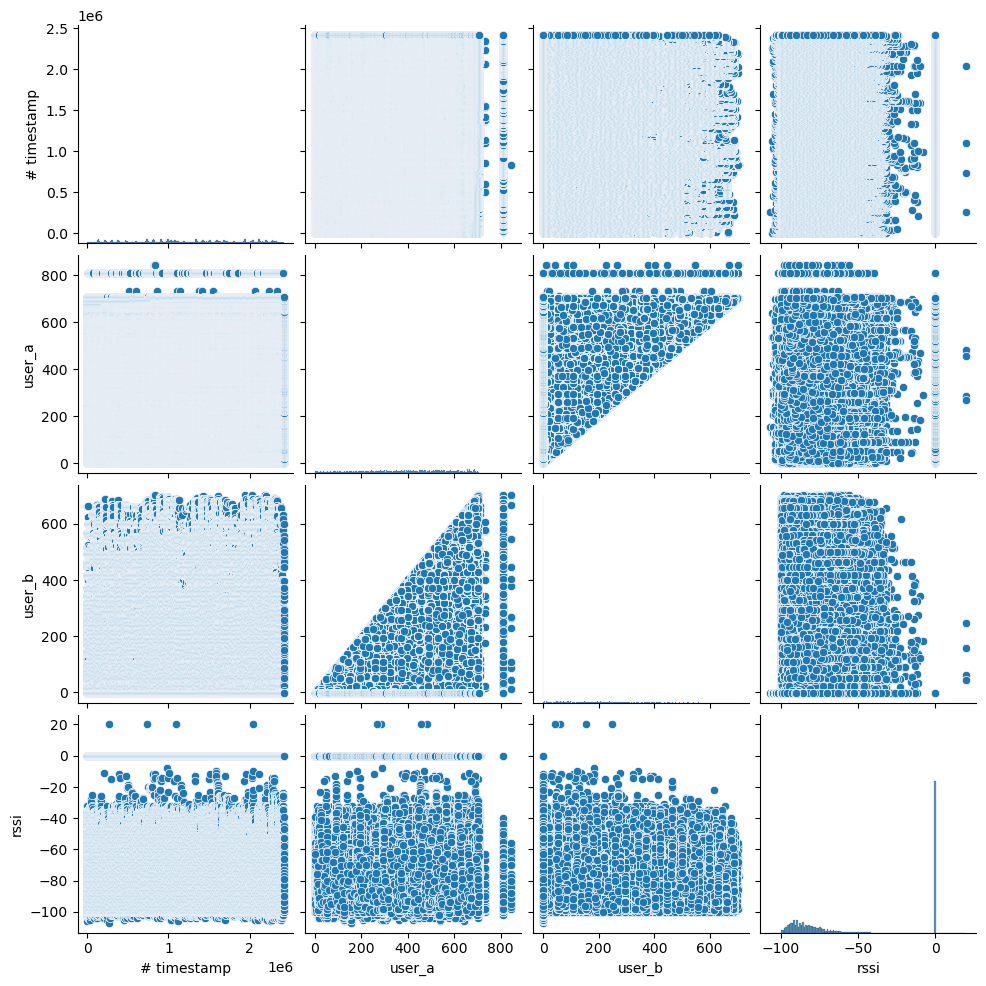

In [6]:
sns.pairplot(df_bt)
plt.show()

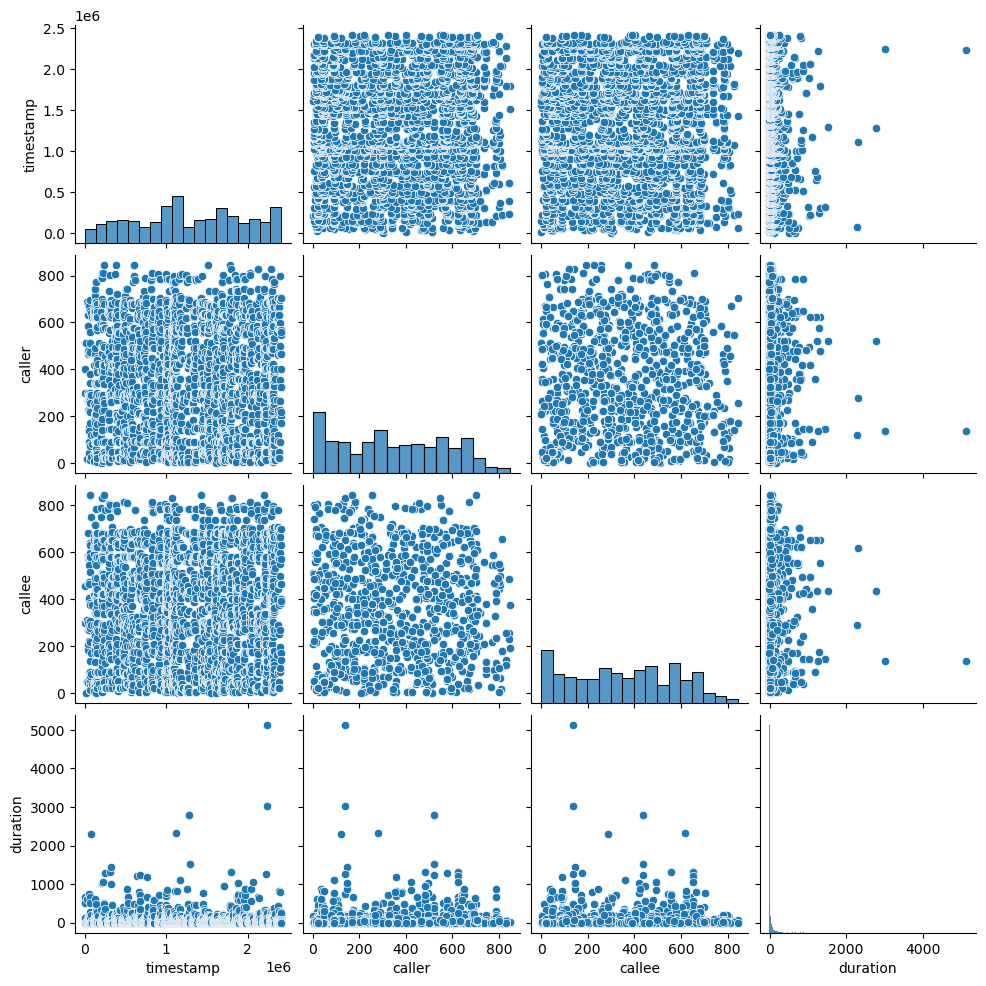

In [48]:
sns.pairplot(df_calls)
plt.show()

In [6]:
# 检查是否有重复的行
print(df_bt.duplicated().sum())

0


In [7]:
# 检查各数据集中是否有缺失值
print(df_bt.isnull().sum())        # 蓝牙数据
print(df_calls.isnull().sum())     # 通话数据
print(df_sms.isnull().sum())       # 短信数据
print(df_facebook_friends.isnull().sum())  # Facebook好友数据
print(df_genders.isnull().sum())   # 性别数据

# timestamp    0
user_a         0
user_b         0
rssi           0
dtype: int64
timestamp    0
caller       0
callee       0
duration     0
dtype: int64
timestamp    0
sender       0
recipient    0
dtype: int64
# user_a    0
user_b      0
dtype: int64
# user    0
female    0
dtype: int64


In [8]:
print(df_bt.shape[0])
df_bt

5474289


,# timestamp,user_a,user_b,rssi
0,0,0,-1,0
1,0,1,-1,0
2,0,2,-1,0
3,0,3,-2,-88
4,0,5,-1,0
...,...,...,...,...
5474284,2418900,702,371,-79
5474285,2418900,703,-1,0
5474286,2418900,704,-1,0
5474287,2418900,705,-2,-90


In [9]:
# empty scan are marked with user B = -1 and RSSI = 0

cleaned_df_bt = df_bt[(df_bt['user_b'] != -1) & (df_bt['user_b'] != -2) & (df_bt['rssi'] < 0)]
print(cleaned_df_bt.shape[0])
cleaned_df_bt

2426275


,# timestamp,user_a,user_b,rssi
15,0,21,20,-73
34,0,47,19,-86
36,0,49,48,-62
51,0,69,44,-87
66,0,90,64,-96
...,...,...,...,...
5474280,2418900,702,194,-83
5474281,2418900,702,259,-58
5474282,2418900,702,294,-94
5474283,2418900,702,359,-94


In [10]:
print(df_calls.shape[0])
df_calls

3600


,timestamp,caller,callee,duration
0,184,300,301,121
1,3920,512,299,670
2,5623,301,300,504
3,9252,401,457,-1
4,15466,512,0,5
...,...,...,...,...
3595,2414934,706,401,78
3596,2415585,218,382,48
3597,2416059,561,631,13
3598,2416368,323,392,4


In [11]:
# duration (-1 means a missed call)
# we focus on interactions that actually took place
cleaned_df_calls = df_calls[df_calls['duration'] > 0]
cleaned_df_calls
print(cleaned_df_calls.shape[0])

2654


In [12]:
# duration (-1 means a missed call)
# we focus on interactions that actually took place
cleaned_df_calls_1 = df_calls[df_calls['duration'] >= 0]
cleaned_df_calls_1
print(cleaned_df_calls_1.shape[0])

3234


In [13]:
df_sms_fil1 = df_sms[df_sms.sender == df_sms.recipient]
df_sms_fil1

,timestamp,sender,recipient


In [14]:
cleaned_df_sms = df_sms

In [15]:
# 创建二元特征，表示是否是Facebook好友
df_facebook_friends['is_friend'] = 1
df_facebook_friends

,# user_a,user_b,is_friend
0,0,512,1
1,0,263,1
2,0,525,1
3,0,285,1
4,0,543,1
...,...,...,...
6424,510,737,1
6425,510,763,1
6426,255,566,1
6427,255,605,1


In [16]:
import pandas as pd

# 确保 df_calls 是一个独立的副本
cleaned_df_calls = cleaned_df_calls.copy()
cleaned_df_bt = cleaned_df_bt.copy()
cleaned_df_sms = cleaned_df_sms.copy()

# 检查 timestamp 列的数据类型，确保它是以秒为单位的相对时间戳
print(cleaned_df_calls['timestamp'].dtype)

# 如果 timestamp 是相对时间戳（单位为秒），则设置起始时间
start_date = pd.to_datetime('2023-01-01')

# 将相对时间戳转换为从2023年1月1日开始的具体日期
cleaned_df_calls['timestamp'] = start_date + pd.to_timedelta(cleaned_df_calls['timestamp'], unit='s')
cleaned_df_bt['# timestamp'] = start_date + pd.to_timedelta(cleaned_df_bt['# timestamp'], unit='s')
cleaned_df_sms['timestamp'] = start_date + pd.to_timedelta(cleaned_df_sms['timestamp'], unit='s')

# 查看转换后的结果
print(cleaned_df_calls[['timestamp']])
print(cleaned_df_bt[['# timestamp']])
print(cleaned_df_sms[['timestamp']])


int64
               timestamp
0    2023-01-01 00:03:04
1    2023-01-01 01:05:20
2    2023-01-01 01:33:43
4    2023-01-01 04:17:46
5    2023-01-01 04:18:17
...                  ...
3595 2023-01-28 22:48:54
3596 2023-01-28 22:59:45
3597 2023-01-28 23:07:39
3598 2023-01-28 23:12:48
3599 2023-01-28 23:13:19

[2654 rows x 1 columns]
                # timestamp
15      2023-01-01 00:00:00
34      2023-01-01 00:00:00
36      2023-01-01 00:00:00
51      2023-01-01 00:00:00
66      2023-01-01 00:00:00
...                     ...
5474280 2023-01-28 23:55:00
5474281 2023-01-28 23:55:00
5474282 2023-01-28 23:55:00
5474283 2023-01-28 23:55:00
5474284 2023-01-28 23:55:00

[2426275 rows x 1 columns]
                timestamp
0     2023-01-01 00:00:18
1     2023-01-01 00:00:37
2     2023-01-01 00:02:06
3     2023-01-01 00:02:14
4     2023-01-01 00:05:12
...                   ...
24328 2023-01-28 22:53:18
24329 2023-01-28 23:13:33
24330 2023-01-28 23:27:18
24331 2023-01-28 23:33:53
24332 2023-01-28 23

In [17]:
# set RSSI > -70
RSSI_THRESHOLD = -70

df_bt_nearby = cleaned_df_bt[cleaned_df_bt['rssi'] > RSSI_THRESHOLD]

df_bt_nearby

,# timestamp,user_a,user_b,rssi
36,2023-01-01 00:00:00,49,48,-62
67,2023-01-01 00:00:00,91,90,-60
207,2023-01-01 00:00:00,288,104,-51
310,2023-01-01 00:00:00,421,414,-68
342,2023-01-01 00:00:00,459,260,-38
...,...,...,...,...
5474180,2023-01-28 23:55:00,549,161,-66
5474197,2023-01-28 23:55:00,569,465,-58
5474237,2023-01-28 23:55:00,635,542,-52
5474272,2023-01-28 23:55:00,694,598,-66


In [18]:
df_bt_nearby[(df_bt_nearby['user_a'] == 5) & (df_bt_nearby['user_b'] == 4)]


,# timestamp,user_a,user_b,rssi
4113724,2023-01-21 21:35:00,5,4,-62


In [19]:
df_bt[(df_bt['user_a'] == 5) & (df_bt['user_b'] == 4)]

,# timestamp,user_a,user_b,rssi
3089741,1356000,5,4,-96
3764701,1633200,5,4,-93
3765219,1633500,5,4,-92
3765748,1633800,5,4,-96
3766272,1634100,5,4,-88
...,...,...,...,...
4140021,1818600,5,4,-90
4140619,1818900,5,4,-89
4141786,1819500,5,4,-97
4142396,1819800,5,4,-95


In [24]:
df_bt_nearby = df_bt_nearby.copy()
# 提取日期
df_bt_nearby['date'] = pd.to_datetime(df_bt_nearby['# timestamp'], unit='s').dt.date

# 按日期计算接近频率，每对用户每天的接近次数
proximity_freq_daily = df_bt_nearby.groupby(['user_a', 'user_b', 'date']).size().reset_index(name='daily_freq')

# 创建每周的起始日期，2023年1月1日是周日，所以直接使用该日期
df_bt_nearby['week'] = pd.to_datetime(df_bt_nearby['# timestamp'], unit='s').dt.to_period('W-SAT').apply(lambda r: r.start_time)

# 计算每对用户每周的接近频率
proximity_freq_weekly = df_bt_nearby.groupby(['user_a', 'user_b', 'week']).size().reset_index(name='weekly_freq')

print(proximity_freq_daily.head(20))
print(proximity_freq_weekly.head(20))

    user_a  user_b        date  daily_freq
0        5       4  2023-01-21           1
1       12      11  2023-01-21           1
2       12      11  2023-01-24           2
3       13       5  2023-01-18           2
4       13       6  2023-01-26           1
5       13      11  2023-01-02           1
6       13      11  2023-01-04           1
7       13      11  2023-01-12           1
8       13      11  2023-01-17           4
9       13      11  2023-01-18           1
10      13      11  2023-01-19           1
11      13      11  2023-01-21           1
12      13      12  2023-01-01          12
13      13      12  2023-01-02           1
14      13      12  2023-01-03           8
15      13      12  2023-01-04          13
16      13      12  2023-01-05           3
17      13      12  2023-01-08          13
18      13      12  2023-01-09          16
19      13      12  2023-01-10          44
    user_a  user_b       week  weekly_freq
0        5       4 2023-01-15            1
1       12 

In [30]:
# 假设每一行表示一次检测，如果相邻的timestamp差值小于5mins,可以将这些行看作是同一次接近事件并计算持续时间。
# or认为是新的接近事件

# 设置时间差阈值为5分钟
time_diff_threshold = pd.Timedelta(seconds=300)  # 5分钟的时间差

# 按用户对和日期分组，并对每组数据按时间戳排序
df_bt_nearby_sorted = df_bt_nearby.sort_values(by=['user_a', 'user_b', '# timestamp'])

# 按用户对和日期进行分组，然后计算每组内的时间差
df_bt_nearby_sorted['time_diff'] = df_bt_nearby_sorted.groupby(['user_a', 'user_b', 'date'])['# timestamp'].diff()

# 对于每对用户在同一天内，只保留相邻事件之间时间差大于阈值的事件
df_bt_nearby_filtered_daily = df_bt_nearby_sorted[
    (df_bt_nearby_sorted['time_diff'].isna()) | (df_bt_nearby_sorted['time_diff'] > time_diff_threshold)
]

# 按周同样处理（可选，如果你还需要按周去重）
df_bt_nearby_filtered_weekly = df_bt_nearby_sorted[
    (df_bt_nearby_sorted['time_diff'].isna()) | (df_bt_nearby_sorted['time_diff'] > time_diff_threshold)
].groupby(['user_a', 'user_b', 'week']).size().reset_index(name='weekly_freq')

# 先按用户对和日期计算每日的接近频率
proximity_freq_daily = df_bt_nearby_filtered_daily.groupby(['user_a', 'user_b', 'date']).size().reset_index(name='daily_freq')

# 计算每周的接近频率：将每天的接近频率按周累加
proximity_freq_weekly = proximity_freq_daily.copy()
proximity_freq_weekly['week'] = pd.to_datetime(proximity_freq_weekly['date']).dt.to_period('W-SAT').apply(lambda r: r.start_time)

# 按周汇总每日的接近频率，确保一周内的接近次数是累计的
proximity_freq_weekly = proximity_freq_weekly.groupby(['user_a', 'user_b', 'week'])['daily_freq'].sum().reset_index(name='weekly_freq')

# 打印结果
print(proximity_freq_daily.head(20))
print(proximity_freq_weekly.head(20))




    user_a  user_b        date  daily_freq
0        5       4  2023-01-21           1
1       12      11  2023-01-21           1
2       12      11  2023-01-24           2
3       13       5  2023-01-18           2
4       13       6  2023-01-26           1
5       13      11  2023-01-02           1
6       13      11  2023-01-04           1
7       13      11  2023-01-12           1
8       13      11  2023-01-17           1
9       13      11  2023-01-18           1
10      13      11  2023-01-19           1
11      13      11  2023-01-21           1
12      13      12  2023-01-01           4
13      13      12  2023-01-02           1
14      13      12  2023-01-03           6
15      13      12  2023-01-04           4
16      13      12  2023-01-05           1
17      13      12  2023-01-08           6
18      13      12  2023-01-09           2
19      13      12  2023-01-10           9
    user_a  user_b       week  weekly_freq
0        5       4 2023-01-15            1
1       12 

In [45]:
# 该时间间隔表示接近结束，假设超过 300 秒（5 分钟）算作新的接近
PROXIMITY_INTERVAL = 300

# 如果时间差大于 PROXIMITY_INTERVAL，则标记为新的接近事件
df_bt_nearby['new_proximity'] = (df_bt_nearby['time_diff'] > PROXIMITY_INTERVAL).fillna(False).astype(int)

# 标记每个接近事件的开始时间
df_bt_nearby['event_id'] = (df_bt_nearby['new_proximity'].cumsum())

# 计算每个接近事件的开始和结束时间
event_start_times = df_bt_nearby.groupby(['user_a', 'user_b', 'event_id'])['# timestamp'].first().reset_index()
event_end_times = df_bt_nearby.groupby(['user_a', 'user_b', 'event_id'])['# timestamp'].last().reset_index()

# 合并开始和结束时间
proximity_events = pd.merge(event_start_times, event_end_times, on=['user_a', 'user_b', 'event_id'], suffixes=('_start', '_end'))

# 计算每个接近事件的持续时间
proximity_events['proximity_duration'] = (proximity_events['# timestamp_end'] - proximity_events['# timestamp_start']).dt.total_seconds()

# 只保留所需的列
df_bt_proximity_duration = proximity_events[['user_a', 'user_b','# timestamp_start', 'proximity_duration']]

print(df_bt_proximity_duration.head(20))



    user_a  user_b   # timestamp_start  proximity_duration
0        5       4 2023-01-21 21:35:00                 0.0
1       12      11 2023-01-21 10:50:00                 0.0
2       12      11 2023-01-24 01:20:00                 0.0
3       12      11 2023-01-24 13:30:00                 0.0
4       13       5 2023-01-18 08:10:00                 0.0
5       13       5 2023-01-18 08:40:00                 0.0
6       13       6 2023-01-26 11:45:00                 0.0
7       13      11 2023-01-02 06:50:00                 0.0
8       13      11 2023-01-04 05:50:00                 0.0
9       13      11 2023-01-12 09:15:00                 0.0
10      13      11 2023-01-17 19:05:00               900.0
11      13      11 2023-01-18 02:10:00                 0.0
12      13      11 2023-01-19 00:05:00                 0.0
13      13      11 2023-01-21 17:10:00                 0.0
14      13      12 2023-01-01 15:35:00                 0.0
15      13      12 2023-01-01 15:45:00               300

In [46]:
# 合并开始和结束时间
proximity_events = pd.merge(event_start_times, event_end_times, on=['user_a', 'user_b', 'event_id'], suffixes=('_start', '_end'))

# 计算每个接近事件的持续时间
proximity_events['proximity_duration'] = (proximity_events['# timestamp_end'] - proximity_events['# timestamp_start']).dt.total_seconds()

# 只保留所需的列，包括开始时间戳和持续时间
df_bt_proximity_duration = proximity_events[['user_a', 'user_b', '# timestamp_start', 'proximity_duration']]

# 汇总每对用户的接近频率和总持续时间
summary = df_bt_proximity_duration.groupby(['user_a', 'user_b']).agg(
    total_proximity_duration=('proximity_duration', 'sum'),
    proximity_count=('proximity_duration', 'size')
).reset_index()

# 合并接近频率和总持续时间
summary_with_freq = summary.merge(proximity_freq_weekly.groupby(['user_a', 'user_b'])['weekly_freq'].sum().reset_index(), on=['user_a', 'user_b'], how='left')

# 打印结果
print(summary_with_freq.head(20))

    user_a  user_b  total_proximity_duration  proximity_count  weekly_freq
0        5       4                       0.0                1            1
1       12      11                       0.0                3            3
2       13       5                       0.0                2            2
3       13       6                       0.0                1            1
4       13      11                     900.0                7           10
5       13      12                   45300.0              148          299
6       14       4                       0.0                2            2
7       15      13                     300.0                1            2
8       21      20                   79800.0              197          463
9       22      13                       0.0                1            1
10      23       1                       0.0                1            1
11      25       0                       0.0                3            3
12      25       3       

In [40]:
print(df_bt_nearby.head(20))

                # timestamp  user_a  user_b  rssi        date       week  \
4113724 2023-01-21 21:35:00       5       4   -62  2023-01-21 2023-01-15   
4045327 2023-01-21 10:50:00      12      11   -68  2023-01-21 2023-01-15   
4517192 2023-01-24 01:20:00      12      11   -64  2023-01-24 2023-01-22   
4627954 2023-01-24 13:30:00      12      11   -65  2023-01-24 2023-01-22   
3413963 2023-01-18 08:10:00      13       5   -66  2023-01-18 2023-01-15   
3420915 2023-01-18 08:40:00      13       5   -64  2023-01-18 2023-01-15   
5038973 2023-01-26 11:45:00      13       6   -68  2023-01-26 2023-01-22   
175724  2023-01-02 06:50:00      13      11   -62  2023-01-02 2023-01-01   
566185  2023-01-04 05:50:00      13      11   -68  2023-01-04 2023-01-01   
2161847 2023-01-12 09:15:00      13      11   -43  2023-01-12 2023-01-08   
3321863 2023-01-17 19:05:00      13      11   -57  2023-01-17 2023-01-15   
3322403 2023-01-17 19:10:00      13      11   -65  2023-01-17 2023-01-15   
3322935 2023

In [32]:
cleaned_df_calls

,timestamp,caller,callee,duration
0,2023-01-01 00:03:04,300,301,121
1,2023-01-01 01:05:20,512,299,670
2,2023-01-01 01:33:43,301,300,504
4,2023-01-01 04:17:46,512,0,5
5,2023-01-01 04:18:17,512,0,28
...,...,...,...,...
3595,2023-01-28 22:48:54,706,401,78
3596,2023-01-28 22:59:45,218,382,48
3597,2023-01-28 23:07:39,561,631,13
3598,2023-01-28 23:12:48,323,392,4


In [27]:
cleaned_df_calls['date'] = pd.to_datetime(cleaned_df_calls['timestamp'], unit='s').dt.date
call_freq_daily = cleaned_df_calls.groupby(['caller', 'callee', 'date']).size().reset_index(name='daily_freq')
call_freq_daily_sorted = call_freq_daily.sort_values(by=['caller', 'callee'])

# 创建每周的起始日期，从周日开始
cleaned_df_calls['week'] = cleaned_df_calls['timestamp'].dt.to_period('W-SAT').apply(lambda r: r.start_time)

# 计算每对用户每周的通话频率
call_freq_weekly = cleaned_df_calls.groupby(['caller', 'callee', 'week']).size().reset_index(name='call_freq')

# 按照 caller 和 callee 排序
call_freq_weekly_sorted = call_freq_weekly.sort_values(by=['caller', 'callee'])

# 查看结果
print(call_freq_daily_sorted)
print(call_freq_weekly_sorted)

# # 查看结果
# print(call_freq_weekly)

      caller  callee        date  daily_freq
0          0     208  2023-01-19           2
1          0     512  2023-01-03           1
2          3      48  2023-01-13           1
3          3      49  2023-01-13           1
4          3      49  2023-01-22           2
...      ...     ...         ...         ...
1787     830     257  2023-01-25           1
1788     845     228  2023-01-05           1
1789     845     256  2023-01-03           1
1790     846     191  2023-01-21           1
1791     846     374  2023-01-18           1

[1792 rows x 4 columns]
      caller  callee       week  call_freq
0          0     208 2023-01-15          2
1          0     512 2023-01-01          1
2          3      48 2023-01-08          1
3          3      49 2023-01-08          1
4          3      49 2023-01-22          2
...      ...     ...        ...        ...
1275     830     257 2023-01-22          1
1276     845     228 2023-01-01          1
1277     845     256 2023-01-01          1
1278 

In [39]:
print(df_calls['timestamp'].head())  # 检查实际的时间戳值

0   2023-01-01 00:03:04
1   2023-01-01 01:05:20
2   2023-01-01 01:33:43
4   2023-01-01 04:17:46
5   2023-01-01 04:18:17
Name: timestamp, dtype: datetime64[ns]


In [219]:
print(df_bt['user_a'].value_counts())


688    19728
553    19724
682    18119
569    16244
401    16163
       ...  
675        1
4          1
66         1
711        1
594        1
Name: user_a, Length: 676, dtype: int64


In [213]:
print(df_bt['user_b'].value_counts())

100    24409
52     21040
92     17950
48     17917
64     16957
       ...  
638        1
704        1
313        1
117        1
702        1
Name: user_b, Length: 676, dtype: int64


In [ ]:
# Data Merging
# 合并物理接近频率和电话、短信、Facebook好友关系
df_combined = proximity_freq.merge(call_freq, left_on=['user_a', 'user_b'], right_on=['caller', 'callee'], how='left')
df_combined = df_combined.merge(sms_freq, left_on=['user_a', 'user_b'], right_on=['sender', 'recipient'], how='left')
df_combined = df_combined.merge(df_facebook_friends, left_on=['user_a', 'user_b'], right_on=['user_a', 'user_b'], how='left')

# 填补缺失值
df_combined.fillna(0, inplace=True)

In [ ]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_combined[['freq', 'call_count', 'total_duration', 'sms_count']] = scaler.fit_transform(
    df_combined[['freq', 'call_count', 'total_duration', 'sms_count']])


In [ ]:
# Clustering
from sklearn.cluster import KMeans

# 选择K值
kmeans = KMeans(n_clusters=3)
df_combined['cluster'] = kmeans.fit_predict(df_combined[['freq', 'call_count', 'total_duration', 'sms_count']])


In [ ]:
#  Also consider DBSCAN, Hierarchical Clustering

In [ ]:
# Correlation Analysis
# Pearson Correlation Coefficient
# 通过相关性分析，评估物理接近频率和数字通讯（如电话、短信）之间的关系

# 计算相关系数矩阵
corr_matrix = df_combined[['freq', 'call_count', 'total_duration', 'sms_count']].corr()
print(corr_matrix)


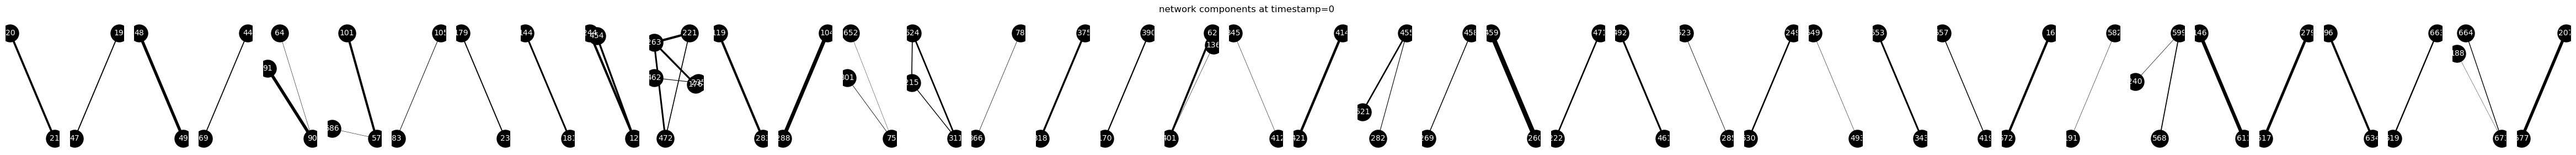

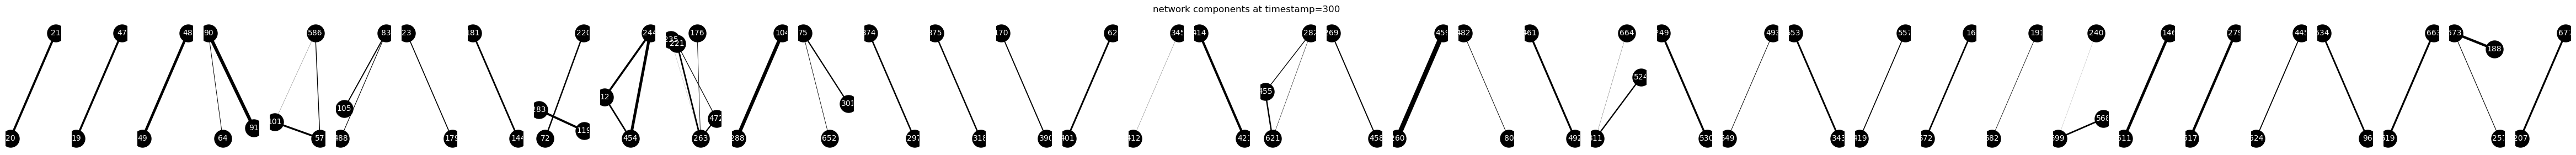

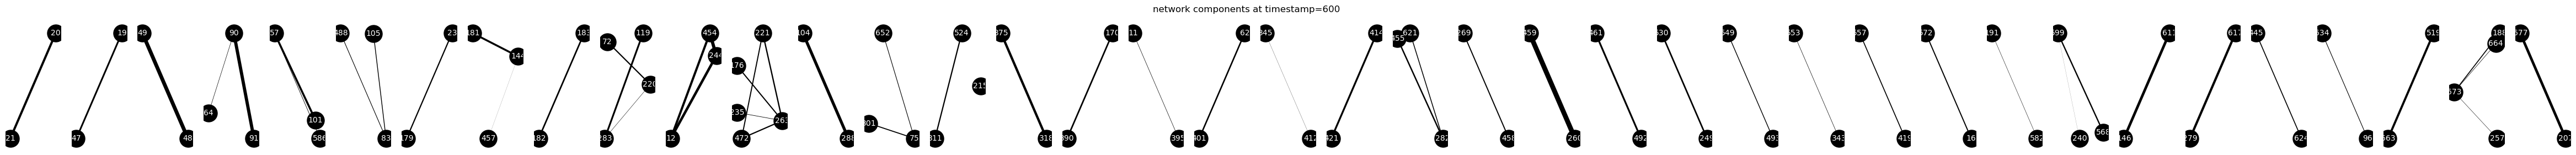

In [25]:
def VisualizeBluetoothNetwork(df_bt, timestamp):
  """ Plots each connected component in |df_bt| network at |timestamp|."""
  # NetworkX graph to plot the results.
  G = nx.Graph()

  # In-study users (id >= 0) at given timestamp.
  in_study_users_at_timestamp = df_bt[(df_bt["# timestamp"] == timestamp)
                                      & (df_bt["user_b"] >= 0)][[
                                          "user_a", "user_b", "rssi"
                                      ]]

  # Builds an undirected network of the in-study users.
  for row in in_study_users_at_timestamp.itertuples():
    user_a = row[1]
    user_b = row[2]
    rssi = row[3]
    G.add_edge(user_a, user_b, weight=rssi)

  # For clarity, we consier each connected component separately.  
  connected_components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
  fig, axs = plt.subplots(1, len(connected_components), figsize=(60, 3))


  
  # Plots the connected components of the network.
  fig.suptitle("network components at timestamp={}".format(timestamp))
  [
      nx.draw(
          connected_component,
          # Positions of nodes are calculatued using spring layout.
          pos=nx.spring_layout(connected_component, scale=0.2),
          ax=axs[i],
          # Width of the edges is based on higher RSSI = stronger edge.
          width=[(100 + connected_component[u][v]["weight"]) / 10.0
                 for u, v in connected_component.edges()],
          node_size=500,
          node_color="black",
          with_labels=True,
          font_size=10,
          font_color="white")
      for i, connected_component in enumerate(connected_components)
  ]


VisualizeBluetoothNetwork(df_bt, 0)
VisualizeBluetoothNetwork(df_bt, 300)
VisualizeBluetoothNetwork(df_bt, 600)

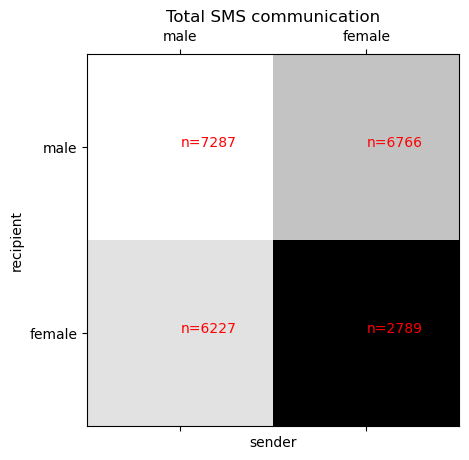

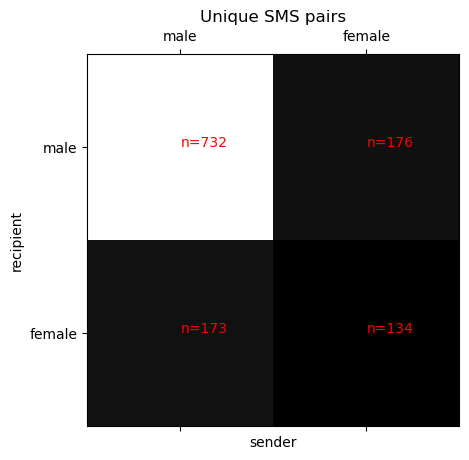

In [6]:
def VisualizeTextMessages(df_sms, df_genders):
  """Plots the SMS communication by gender of senders and recipients."""

  # Creates SMS network including gender of the senders.
  df_sms_with_gender_sender = pd.merge(
      df_sms, df_genders, left_on="sender", right_on="# user").rename(
          index=str, columns={
              "female": "female_sender"
          }).drop(
              "# user", axis=1)

  # Creates SMS network including gender of the recipients.
  df_sms_with_gender = pd.merge(
      df_sms_with_gender_sender,
      df_genders,
      left_on="recipient",
      right_on="# user").rename(
          index=str, columns={
              "female": "female_recipient"
          }).drop(
              "# user", axis=1)

  # Computes total communication (all messages) and number of unique pairs based
  # on sender and recipient gender.
  totals = np.zeros((2, 2))
  unique_pairs = np.zeros((2, 2))
  for female_sender in [0, 1]:
    for female_recipient in [0, 1]:
      totals[female_sender, female_recipient] = df_sms_with_gender[
          (df_sms_with_gender["female_sender"] == female_sender)
          &
          (df_sms_with_gender["female_recipient"] == female_recipient)].shape[0]
      unique_pairs[female_sender, female_recipient] = df_sms_with_gender[
          (df_sms_with_gender["female_sender"] == female_sender)
          & (df_sms_with_gender["female_recipient"] == female_recipient)][[
              "sender", "recipient"
          ]].drop_duplicates().shape[0]

  # Plots the breakdowns.
  plt.matshow(totals, cmap=plt.cm.gray)
  plt.grid(False)
  plt.xlabel("sender")
  plt.ylabel("recipient")
  plt.xticks([0, 1], ["male", "female"])
  plt.yticks([0, 1], ["male", "female"])
  [
      plt.text(
          sender,
          recipient,
          "n={}".format(int(totals[sender][recipient])),
          color="red")
      for sender, recipient in itertools.product([0, 1], [0, 1])
  ]
  plt.title("Total SMS communication")

  plt.matshow(unique_pairs, cmap=plt.cm.gray)
  plt.grid(False)
  plt.xlabel("sender")
  plt.ylabel("recipient")
  plt.xticks([0, 1], ["male", "female"])
  plt.yticks([0, 1], ["male", "female"])
  [
      plt.text(
          sender,
          recipient,
          "n={}".format(int(unique_pairs[sender][recipient])),
          color="red")
      for sender, recipient in itertools.product([0, 1], [0, 1])
  ]
  plt.title("Unique SMS pairs")


VisualizeTextMessages(df_sms, df_genders)